<a href="https://colab.research.google.com/github/luciainnocenti/NetworkDynamics/blob/main/Homework01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Exercise 3.b



Let's define the graph by using the adjacency matrix, which contains at each cell $W_{i,j}$ the link wheight between $i$ and $j$

In [ ]:
G = nx.Graph()

In [ ]:
W = np.array([  [0,1,1,0,1,0,0,0,0,0,0,0,0,0,0], 
                [1,0,1,0,0,0,0,1,0,0,0,0,0,0,0],
                [1,1,0,1,0,0,0,1,0,0,0,0,0,0,0],
                [0,0,1,0,0,1,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
                [0,0,0,1,1,0,1,0,0,0,1,0,1,1,0],
                [0,0,0,0,0,1,0,0,1,0,0,0,0,0,0],
                [0,1,1,0,0,0,0,0,1,0,0,0,0,0,0],
                [0,0,0,0,0,0,1,1,0,1,1,0,0,0,0],
                [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                [0,0,0,0,0,1,0,0,1,0,0,1,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                ])

In [ ]:
G = nx.from_numpy_matrix(W)

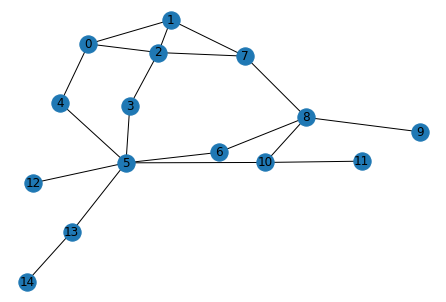

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels=True)

Now let's define the suppport matrices like:

*   $w$ -> contains, for each node, the out-degree. It corresponds, in the undirected graph, to the number of links arriving to each node.
*   $D$ -> is the diagonal matrix aving $w$ in the diag and $0$ in all the other cells
*   $P$ -> it's the Averge Weighted matrix, so each element in the cell contanins a value between $0$ and $1$ which defines the portion of flow from the node that flows into that edge
*   $L$ -> the Laplacian matrix



In [ ]:
w = np.sum(W,axis=1) #degrees vector
D = np.diag(w) #Diagonal Matrix
P = np.linalg.inv(D) @ W #Average Weighted matrix

In [ ]:
L = D - W
L

array([[ 3, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  3, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
       [-1, -1,  4, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  2,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1, -1,  6, -1,  0,  0,  0, -1,  0, -1, -1,  0],
       [ 0,  0,  0,  0,  0, -1,  2,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0, -1, -1,  0,  0,  0,  0,  3, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1, -1,  4, -1, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  3, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  2, -1],
       [ 0,  0,  0,  0,  0,  0,  0

The list of stubborn nodes, that is sub-set on graph nodes having an exogenous flow.
In this application we consider fixed valued for exogenous flows, so instead of $u(t)$ I've used $u_S$ or $u$

In [ ]:
stubborn_nodes = {5:1, 2:-1}
list(stubborn_nodes.keys())

[5, 2]

In [ ]:
regular = [node for node in G.nodes if node not in list(stubborn_nodes.keys())]
regular

[0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14]

The matrix $P$ can be splitted into 4 sub matrices:


*  $Q$ -> edges going from regular nodes to regular ones
*  $E$ -> edges going from regular nodes to stubborn ones
*  $F$ -> edges going from stubborn nodes to regular ones
*  $C$ -> edges going from stubborn nodes to stubborn ones

And this allow us to study how the flow change in the graph by the influence of stubborn nodes


In [ ]:
Q = P[np.ix_(regular, regular)]
E = P[np.ix_(regular, list(stubborn_nodes.keys()))]
F = P[np.ix_(list(stubborn_nodes.keys()), regular)]
C = P[np.ix_(list(stubborn_nodes.keys()), list(stubborn_nodes.keys()))]

In [ ]:
x_0 = np.zeros(len(G))
x_0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

When in the network there are exogenus flows, and we want to study how node opinions change and what is the asymptotic state for all the nodes, we are not intrested in the original opinions of regular nodes. This is because, going over and over, at each step their opinion will change while stubborn nodes opinions will remain the same. So the final value only depends on the fixed state of stubborn nodes.

In order to hihlight it, let's define initial condition for regular nodes by using a random generator:

In [ ]:
for i in range(len(G)):
  if(i in list( stubborn_nodes.keys()) ):
    x_0[i] = stubborn_nodes[i]
  else:
    x_0[i] = np.random.random()
x_0

array([ 0.86523143,  0.35557501, -1.        ,  0.2135407 ,  0.6508043 ,
        1.        ,  0.41373704,  0.17087706,  0.67722953,  0.88408915,
        0.74100771,  0.80054512,  0.39034168,  0.49373844,  0.19898135])

The final opinions vector $x$ is defined as: \\
$ x_i = \sum_{s \in S} (HE)_{is}u_s $

and we can interpret is ad the sum of all the stubborn opinions $u$ times the probability that each opinion in $S$ can reach the node $i$

In [ ]:
I = np.identity(len(Q))
H = np.linalg.inv( I - Q)

In [ ]:
stubborn_nodes.values()

dict_values([1, -1])

In [ ]:
x_t = H @ E @ list( stubborn_nodes.values())
x_t

array([-0.45454545, -0.63636364,  0.        ,  0.27272727,  0.63636364,
       -0.45454545,  0.27272727,  0.27272727,  0.63636364,  0.63636364,
        1.        ,  1.        ,  1.        ])

In [ ]:
x = [0]*len(G)
k = 0
for i in range(len(G)):
  if( i in list(stubborn_nodes.keys() )):
    x[i] = stubborn_nodes[i]
  else:
    x[i] = x_t[k]
    k += 1
x = np.array(x)
x

array([-0.45454545, -0.63636364, -1.        ,  0.        ,  0.27272727,
        1.        ,  0.63636364, -0.45454545,  0.27272727,  0.27272727,
        0.63636364,  0.63636364,  1.        ,  1.        ,  1.        ])

In [ ]:
stb = list(stubborn_nodes.keys() )
stb

[5, 2]

In [ ]:
x_0

array([ 0.86523143,  0.35557501, -1.        ,  0.2135407 ,  0.6508043 ,
        1.        ,  0.41373704,  0.17087706,  0.67722953,  0.88408915,
        0.74100771,  0.80054512,  0.39034168,  0.49373844,  0.19898135])

In [ ]:
#Plot the dynamics over 100 steps in order to show the trajectory:
n = 100
k = 0
step = np.zeros( (len(G), n) )
for i in range(len(G)):
  if i not in stb:
    step[i,0] = x_0[i]
  else:
   step[i,0] = stubborn_nodes[i]

In [ ]:
step[:,0]

array([ 0.86523143,  0.35557501, -1.        ,  0.2135407 ,  0.6508043 ,
        1.        ,  0.41373704,  0.17087706,  0.67722953,  0.88408915,
        0.74100771,  0.80054512,  0.39034168,  0.49373844,  0.19898135])

By plotting the value of $x$ changing in $100$ steps, we can clearly see how there is not congercenge in the model:

In [ ]:
for i in range(1,n):
  step[regular, i] = Q @ step[regular, i-1] + E @ step[stb, i-1]
  step[stb, i] = step[stb, i-1];

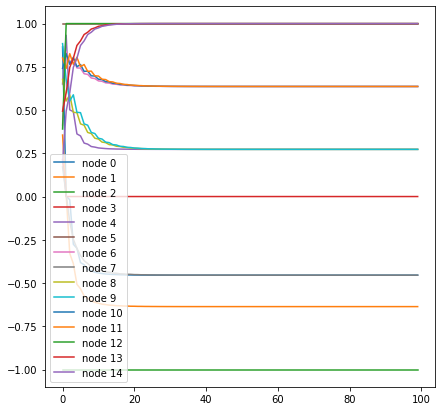

In [ ]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in range(len(G)):
    trajectory = step[node,:]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()

#Exercise 3.d

Starting from the previosly defined matrices, let's define a new value that is the mass available in each node at time $t$: \\
$y(t) = [y_r(t), u(t)]'$ \\
$ y_r(t+1) = Qx_r(t) + Ev(t)$

Where $r$ refers to regular nodes.
Also in this case, fixed input values are used. So $v(t)$ becames just $v$

The linear network flow dynamics allow us also to study the page-rank centrality vector: in fact we can consider the page-rank vector as the limit of the linear netwrok flow dynamics model with exogenous inputs:

$y_r(t +1) = Q'y_r(t) + \lambda$ \\
where \\
 
$Q = (1- \beta)P$ \\
and \\
$\lambda = \beta v$

The uniform input $v$ is defined as if each node recives the $ \dfrac{1}{n}$ part of the total input flow (that is $1$), where $n = len(G)$

In [ ]:
v = np.ones(len(G))/len(G)
v

array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])

In [ ]:
step = np.zeros( (len(G), n) )
step[:,0] = v

In [ ]:
beta = 0.15
Q = (1 - beta)*P 
l = beta*v

In [ ]:
for i in range(1,n):
  step[:, i] = Q.T @ step[:, i-1] + l

In [ ]:
step[:,99]

array([0.07165777, 0.07018671, 0.09231801, 0.05144151, 0.05212696,
       0.15405126, 0.05384753, 0.07152741, 0.10364047, 0.0320236 ,
       0.08212627, 0.03326911, 0.03182393, 0.06312944, 0.03683001])

In order to check if the solution is correct, we can compare it with the one provided by the standard method in NetworkX, which is defined in the same way. The results, as shown in the next cell, are corrects.

In [ ]:
nx.pagerank( G, alpha=(1-beta))

{0: 0.07165770456948055,
 1: 0.07018669768905662,
 2: 0.09231779767919303,
 3: 0.051441782879237674,
 4: 0.05212720844546091,
 5: 0.1540500134086529,
 6: 0.05384795771711494,
 7: 0.07152768304944947,
 8: 0.10363968342248671,
 9: 0.0320238086261405,
 10: 0.0821269590583218,
 11: 0.03326886799001193,
 12: 0.03182414909097444,
 13: 0.06312994200096989,
 14: 0.036829744373448464}

#Exercise 4

## Useful functions

In [ ]:
def matricesGenerator(stubborn_nodes, G):
  regular = [node for node in G.nodes if node not in list(stubborn_nodes.keys())]

  W = nx.adjacency_matrix(G).toarray() #adjacency matrix
  w = np.sum(W,axis=1) #degrees vector
  D = np.diag(w) #Diagonal Matrix
  P = np.linalg.inv(D) @ W #Average Weighted matrix

  #Define sub matrix
  Q = P[np.ix_(regular, regular)]
  E = P[np.ix_(regular, list(stubborn_nodes.keys()))]
  F = P[np.ix_(list(stubborn_nodes.keys()), regular)]
  C = P[np.ix_(list(stubborn_nodes.keys()), list(stubborn_nodes.keys()))]

  return (W,Q,E,F,C)

##Part1

EdgeView([(0, 1), (0, 3), (0, 4), (1, 2), (1, 7), (2, 3), (2, 6), (3, 5), (4, 5), (4, 7), (5, 6), (6, 7)])

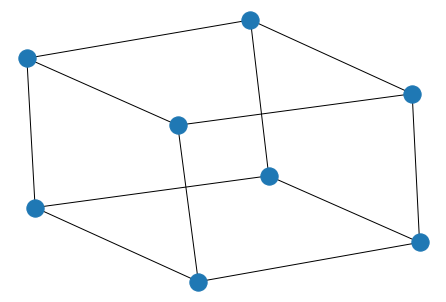

In [ ]:
G1 = nx.cubical_graph()
nx.draw(G1)
G1.edges

In [ ]:
results = {}
l = list(G1.nodes)
l.remove(0)
for node in l:
  stubborn_nodes = {0:0, node:1}
  W,Q,E,F,C = matricesGenerator(stubborn_nodes, G1)
  I = np.identity(len(Q))
  H = np.linalg.inv( I - Q)
  x_t = H @ E @ list( stubborn_nodes.values())
  results[node] = np.average(x_t)
results

{1: 0.5,
 2: 0.49999999999999983,
 3: 0.49999999999999983,
 4: 0.5,
 5: 0.49999999999999994,
 6: 0.49999999999999994,
 7: 0.49999999999999994}

As expected, all elements in "results" vector have more or less the same value (tiny variations are explainable by computer numerical representation)

## Part2

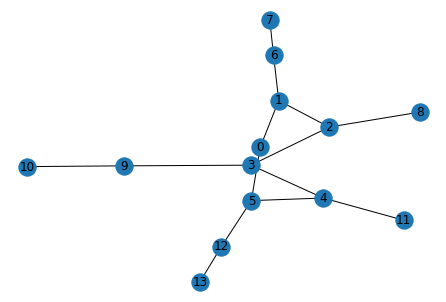

In [ ]:
n = 6
G2 = nx.cycle_graph(n)

for i in range(1, n):
  k = len(G2) - 1
  if(i%2 != 0):
    G2.add_edges_from([ (i,k + 1), (k+1, k+2) ])
  else:
    G2.add_edge(i,k + 1)
  
pos = nx.spring_layout(G2)
nx.draw(G2,pos, with_labels=True)


In [ ]:
results = {}
l = list(G2.nodes)
l.remove(0)
for node in l:
  stubborn_nodes = {0:0, node:1}
  W,Q,E,F,C = matricesGenerator(stubborn_nodes, G2)
  I = np.identity(len(Q))
  H = np.linalg.inv( I - Q)
  x_t = H @ E @ list( stubborn_nodes.values())
  results[node] = np.average(x_t)
results

{1: 0.5666666666666668,
 2: 0.5416666666666666,
 3: 0.5555555555555555,
 4: 0.5416666666666666,
 5: 0.5666666666666665,
 6: 0.303030303030303,
 7: 0.1960784313725491,
 8: 0.3095238095238094,
 9: 0.36666666666666664,
 10: 0.26190476190476186,
 11: 0.3095238095238095,
 12: 0.30303030303030304,
 13: 0.19607843137254902}

Also in this case, as expected, the best value to be stubborn are the stubborn-neighboors 